# Cohort analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
name_of_file='RFM data.csv'
path = '/content/gdrive/My Drive/Colab Notebooks/'+ name_of_file

In [ ]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from datetime import date, time, datetime
from operator import attrgetter

In [ ]:
df = pd.read_csv(path,
                 sep=";",
                 skiprows=0,
             engine='python')

print (df)

       CustomerID SalesOrderNumber  SalesAmount   OrderDate
0           15084          SO54147    2419.0600  2020-03-09
1           14522          SO66951      53.9900  2020-09-24
2           16190          SO72219      71.9700  2020-12-03
3           21225          SO47141    2181.5625  2019-02-06
4           12188          SO54173    2354.9800  2020-03-10
...           ...              ...          ...         ...
27654       14156          SO70784     195.5900  2020-11-14
27655       21843          SO55776      13.9800  2020-04-06
27656       25305          SO56134    1725.9800  2020-04-13
27657       20599          SO64144      32.2700  2020-08-13
27658       13470          SO73539      56.9700  2020-12-20

[27659 rows x 4 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27659 entries, 0 to 27658
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        27659 non-null  int64  
 1   SalesOrderNumber  27659 non-null  object 
 2   SalesAmount       27659 non-null  float64
 3   OrderDate         27659 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 864.5+ KB


In [ ]:
df.dropna()

,CustomerID,SalesOrderNumber,SalesAmount,OrderDate
0,15084,SO54147,2419.0600,2020-03-09
1,14522,SO66951,53.9900,2020-09-24
2,16190,SO72219,71.9700,2020-12-03
3,21225,SO47141,2181.5625,2019-02-06
4,12188,SO54173,2354.9800,2020-03-10
...,...,...,...,...
27654,14156,SO70784,195.5900,2020-11-14
27655,21843,SO55776,13.9800,2020-04-06
27656,25305,SO56134,1725.9800,2020-04-13
27657,20599,SO64144,32.2700,2020-08-13


In [ ]:
df.describe()

,CustomerID,SalesAmount
count,27659.000000,27659.000000
mean,18845.782530,1061.451145
std,5486.239775,1149.026001
min,11000.000000,2.290000
25%,13968.000000,46.470000
50%,18096.000000,594.970000
75%,23534.500000,2181.562500
max,29483.000000,3578.270000


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format="%Y-%m-%d", errors='coerce') #меняем тип данных у дат
df['order_month'] = df['OrderDate'].dt.to_period('M') #создаем новый столбец - месяц и год покупки
df['cohort'] = df.groupby('CustomerID')['OrderDate'].transform('min').dt.to_period('M')

In [ ]:
df.head()

,CustomerID,SalesOrderNumber,SalesAmount,OrderDate,order_month,cohort
0,15084,SO54147,2419.0600,2020-03-09,2020-03,2019-01
1,14522,SO66951,53.9900,2020-09-24,2020-09,2020-05
2,16190,SO72219,71.9700,2020-12-03,2020-12,2020-03
3,21225,SO47141,2181.5625,2019-02-06,2019-02,2019-02
4,12188,SO54173,2354.9800,2020-03-10,2020-03,2018-12


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format="%Y-%m-%d", errors='coerce')

In [ ]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [ ]:

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [ ]:
print(cohort_pivot)

period_number      0     1     2     3     4     5     6     7     8     9   \
cohort                                                                        
2017-12          14.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-01         144.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-02         144.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03         150.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04         157.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05         174.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06         230.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-07         188.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-08         193.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-09         185.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-10         221.0   NaN   NaN   NaN   NaN   NaN 

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [ ]:
print(retention_matrix)

period_number   0         1         2         3         4         5   \
cohort                                                                 
2017-12        1.0       NaN       NaN       NaN       NaN       NaN   
2018-01        1.0       NaN       NaN       NaN       NaN       NaN   
2018-02        1.0       NaN       NaN       NaN       NaN       NaN   
2018-03        1.0       NaN       NaN       NaN       NaN       NaN   
2018-04        1.0       NaN       NaN       NaN       NaN       NaN   
2018-05        1.0       NaN       NaN       NaN       NaN       NaN   
2018-06        1.0       NaN       NaN       NaN       NaN       NaN   
2018-07        1.0       NaN       NaN       NaN       NaN       NaN   
2018-08        1.0       NaN       NaN       NaN       NaN       NaN   
2018-09        1.0       NaN       NaN       NaN       NaN       NaN   
2018-10        1.0       NaN       NaN       NaN       NaN       NaN   
2018-11        1.0       NaN       NaN       NaN       NaN      

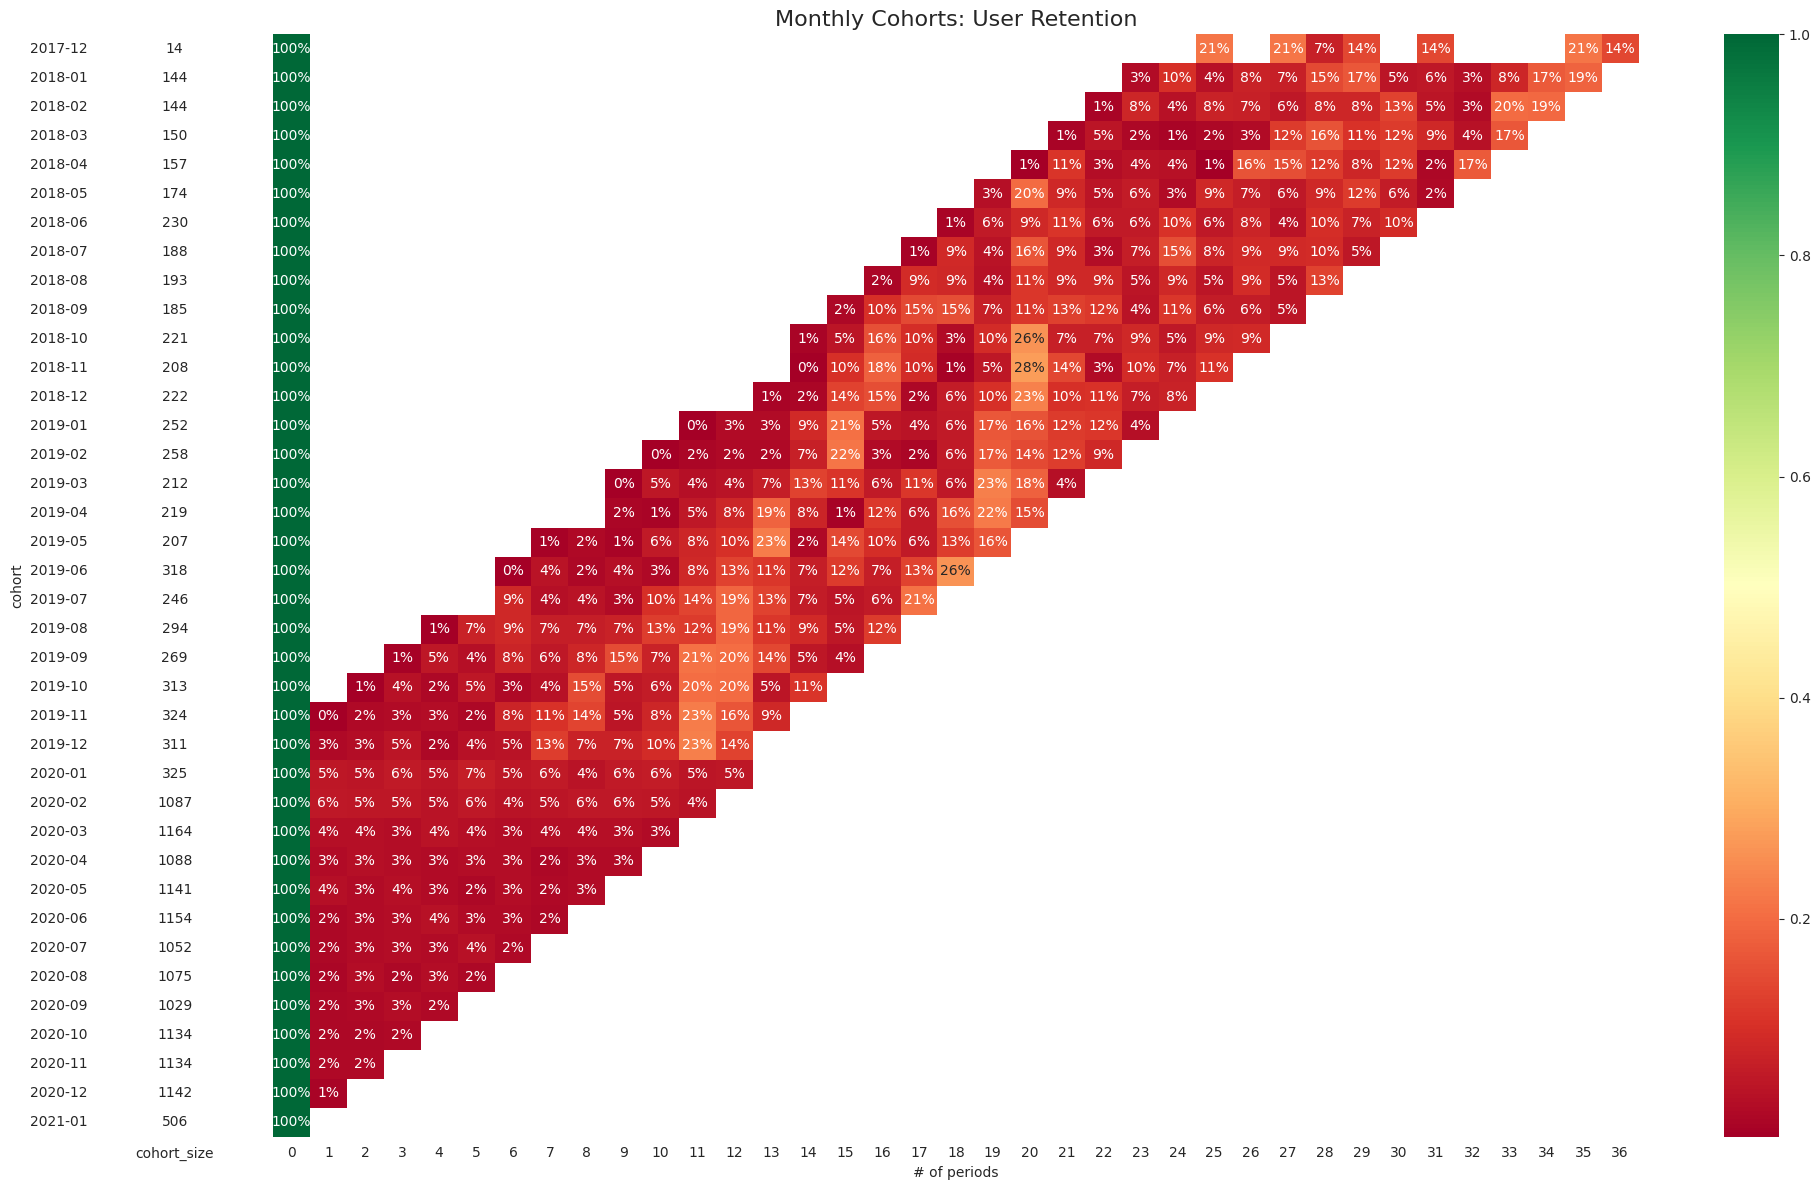

In [ ]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

# RFM Segmentation

In [ ]:
PRESENT = dt.datetime(year=2021, month=10, day=7, hour=13, minute=14, second=31)
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format="%Y-%m-%d", errors='coerce')

In [ ]:
df

,CustomerID,SalesOrderNumber,SalesAmount,OrderDate,order_month,cohort
0,15084,SO54147,2419.0600,2020-03-09,2020-03,2019-01
1,14522,SO66951,53.9900,2020-09-24,2020-09,2020-05
2,16190,SO72219,71.9700,2020-12-03,2020-12,2020-03
3,21225,SO47141,2181.5625,2019-02-06,2019-02,2019-02
4,12188,SO54173,2354.9800,2020-03-10,2020-03,2018-12
...,...,...,...,...,...,...
27654,14156,SO70784,195.5900,2020-11-14,2020-11,2020-02
27655,21843,SO55776,13.9800,2020-04-06,2020-04,2020-04
27656,25305,SO56134,1725.9800,2020-04-13,2020-04,2020-04
27657,20599,SO64144,32.2700,2020-08-13,2020-08,2020-08


In [ ]:
rfm= df.groupby('CustomerID').agg({'OrderDate': lambda date: (PRESENT - date.max()).days,
                                        'SalesOrderNumber': lambda num: len(num),
                                        'SalesAmount': lambda price: price.sum()})

In [ ]:
rfm.head(100)

,OrderDate,SalesOrderNumber,SalesAmount
CustomerID,,,
11000,522,3,8248.99
11001,301,3,6383.88
11002,592,3,8114.04
11003,515,3,8139.29
11004,524,3,8196.01
...,...,...,...
11095,469,3,8158.01
11096,434,3,8063.04
11097,440,3,8099.03


In [ ]:
rfm.columns

Index(['OrderDate', 'SalesOrderNumber', 'SalesAmount'], dtype='object')

In [ ]:
rfm.columns=['recency','frequency','monetary']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
11000,522,3,8248.99
11001,301,3,6383.88
11002,592,3,8114.04
11003,515,3,8139.29
11004,524,3,8196.01


In [ ]:
quartiles = rfm.quantile(q=[0.2,0.4,0.6,0.8,1])
print(quartiles, type(quartiles))

     recency  frequency   monetary
0.2    324.0        1.0     39.980
0.4    384.0        1.0     91.970
0.6    457.0        1.0   1155.480
0.8    539.0        2.0   3271.928
1.0   1378.0       28.0  13295.380 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.2: 324.0, 0.4: 384.0, 0.6: 457.0, 0.8: 539.0, 1.0: 1378.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0, 1.0: 28.0},
 'monetary': {0.2: 39.98,
  0.4: 91.97,
  0.6: 1155.48,
  0.8: 3271.9280000000003,
  1.0: 13295.38}}

In [ ]:
## for Recency

def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

## for Frequency and Monetary value

def FMClass(x,p,d):
    if x <= d[p][0.20]:
        return 1
    if x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
       return 4
    else:
        return 5

In [ ]:
rfmSeg = rfm
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary'].apply(FMClass, args=('monetary',quartiles,))

In [ ]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [ ]:
rfmSeg.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
11000,522,3,8248.99,2,5,5,255
11001,301,3,6383.88,5,5,5,555
11002,592,3,8114.04,1,5,5,155
11003,515,3,8139.29,2,5,5,255
11004,524,3,8196.01,2,5,5,255


In [ ]:
rfmSeg.sort_values(by=['RFMClass', 'monetary'], ascending=[True, False])

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12741,545,1,39.9800,1,1,1,111
12832,563,1,39.9800,1,1,1,111
12840,589,1,39.9800,1,1,1,111
13497,591,1,39.9800,1,1,1,111
13574,616,1,39.9800,1,1,1,111
...,...,...,...,...,...,...,...
16054,293,3,3759.3625,5,5,5,555
16053,288,3,3752.3825,5,5,5,555
16033,284,3,3743.3925,5,5,5,555


In [ ]:
rfmSeg.groupby('RFMClass').agg('monetary').mean()

,monetary
RFMClass,
111,23.803314
112,66.730998
113,522.423998
114,2058.761749
115,3557.125529
...,...
551,34.560000
552,65.676522
553,283.331822


In [ ]:
rfmSeg.groupby('M_Quartile').agg('monetary').mean()

,monetary
M_Quartile,
1,23.857352
2,66.795384
3,420.382881
4,2171.942081
5,5273.356756


In [ ]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18484 entries, 11000 to 29483
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      18484 non-null  int64  
 1   frequency    18484 non-null  int64  
 2   monetary     18484 non-null  float64
 3   R_Quartile   18484 non-null  int64  
 4   F_Quartile   18484 non-null  int64  
 5   M_Quartile   18484 non-null  int64  
 6   RFMClass     18484 non-null  object 
 7   Total Score  18484 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.3+ MB
            recency  frequency  monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                     
11000           522          3   8248.99           2           5           5   
11001           301          3   6383.88           5           5           5   
11002           592          3   8114.04           1           5           5   
11003      

In [ ]:
rfmSeg.groupby('Total Score').agg('monetary').mean()

,monetary
Total Score,
3,23.803314
4,40.582017
5,172.944580
6,667.368841
7,829.416384
8,595.578000
9,1179.951794
10,2660.311829
11,2835.934505


In [ ]:
rfmSeg.groupby('Total Score').agg('frequency').mean()

,frequency
Total Score,
3,1.000000
4,1.000000
5,1.000000
6,1.001673
7,1.012679
8,1.105634
9,1.377778
10,1.765625
11,2.076705


In [ ]:
rfmSeg.groupby('Total Score').agg('recency').mean()

,recency
Total Score,
3,578.854857
4,530.853641
5,495.789527
6,483.132581
7,464.914928
8,360.611268
9,392.654074
10,452.251250
11,424.760653


<Axes: xlabel='Total Score'>

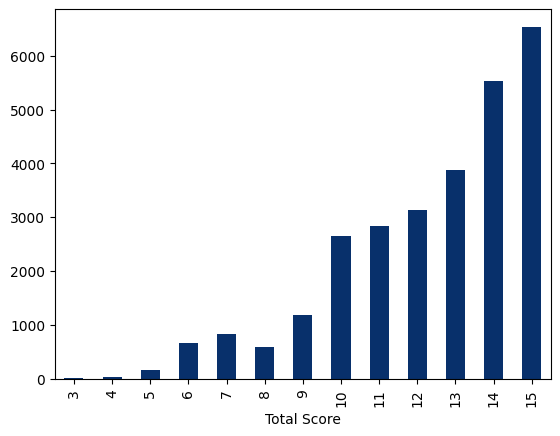

In [ ]:
rfmSeg.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

Champions - bought recently, buy often and spend the most
Loyal Customers - spend good money and often, responsive to promotions
Potential Loyalist - recent customers, but spent a good amount and bought more than once
New Customers - bought most recently, but not often
Promising - recent shoppers, but haven’t spent much
Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though
About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated
At Risk - spent big money and purchased often but long time ago; need to bring them back
Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time
Hibernating - last purchase was long back, low spenders and low number of orders

In [ ]:
rfm['segment'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str)
rfm['segment'] = rfm['segment'].replace(seg_map, regex=True)

In [ ]:
rfm.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,segment
CustomerID,,,,,,,,,
11000,522,3,8248.99,2,5,5,255,12,Can't Lose
11001,301,3,6383.88,5,5,5,555,15,Champions
11002,592,3,8114.04,1,5,5,155,11,Can't Lose
11003,515,3,8139.29,2,5,5,255,12,Can't Lose
11004,524,3,8196.01,2,5,5,255,12,Can't Lose


In [ ]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)
segments_counts

,count
segment,
Can't Lose,203
Champions,1672
At Risk,1906
Promising,2051
New Customers,2097
About to Sleep,2188
Loyal Customers,3084
Hibernating,5283


In [ ]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency       frequency           monetary      
                       mean count      mean count         mean count
segment                                                             
About to Sleep   420.602834  2188  1.000000  2188   388.002916  2188
At Risk          534.727177  1906  2.000000  1906  3513.788976  1906
Can't Lose       498.477833   203  3.073892   203  6068.561863   203
Champions        294.825957  1672  2.765550  1672  2581.208129  1672
Hibernating      585.972743  5283  1.000000  5283   691.293620  5283
Loyal Customers  385.717250  3084  2.263294  3084  3361.132256  3084
New Customers    293.434907  2097  1.000000  2097   523.024788  2097
Promising        353.502682  2051  1.000000  2051   560.764481  2051

<ipython-input-111-8fe0a07cf688>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


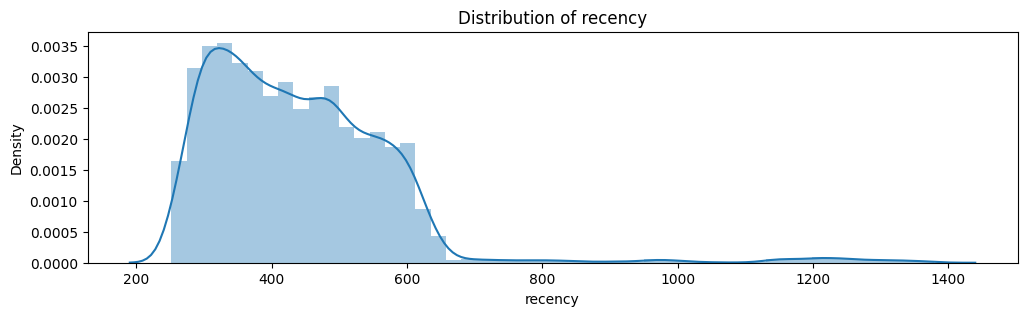

<ipython-input-111-8fe0a07cf688>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


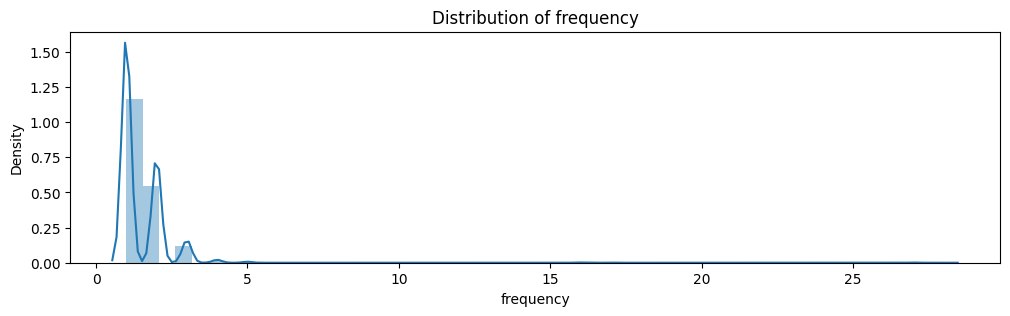

<ipython-input-111-8fe0a07cf688>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


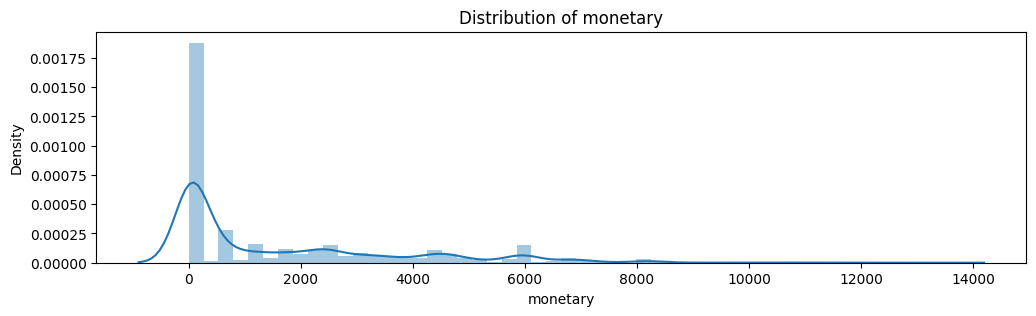

In [ ]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>

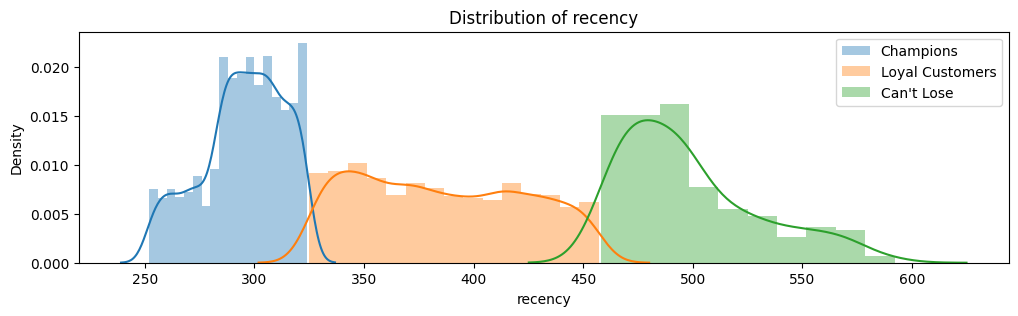

<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>

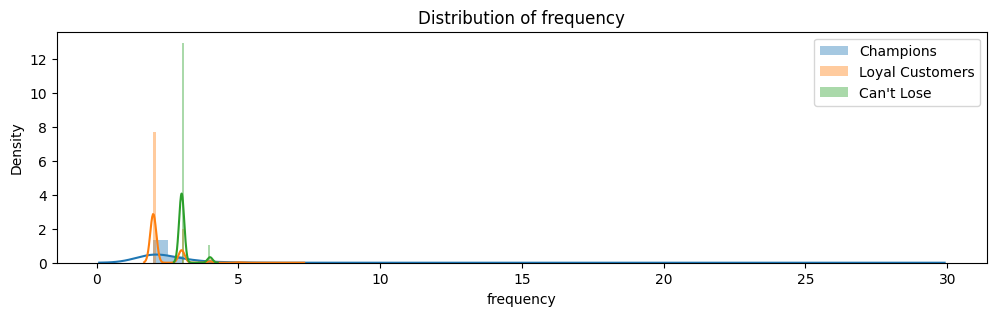

<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
<ipython-input-112-8f8a51cde9b2>

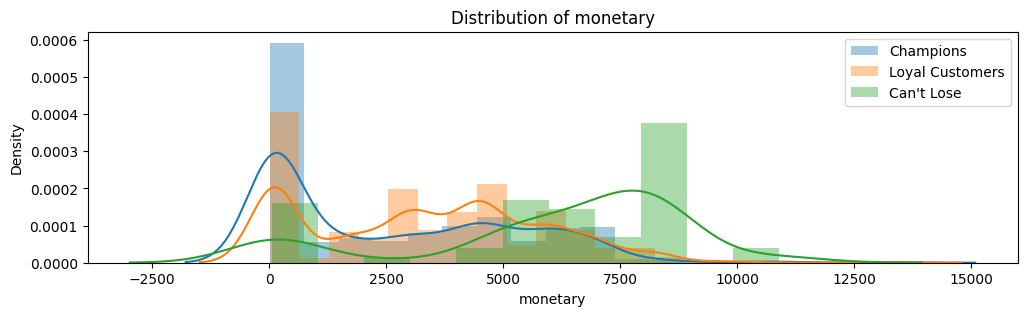

In [ ]:
segments = ['Champions', 'Loyal Customers', "Can't Lose"]

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(rfm[rfm['segment']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

In [ ]:
agg_dict2 = {
    'recency': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = rfm.groupby('segment').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'segment': 'label', 'recency': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

In [ ]:
pip install squarify

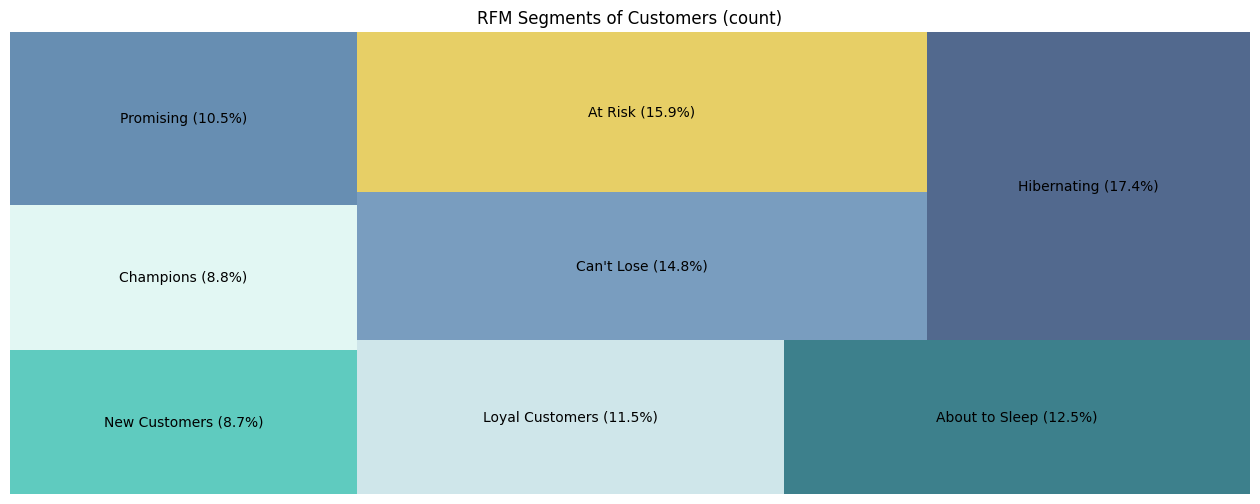

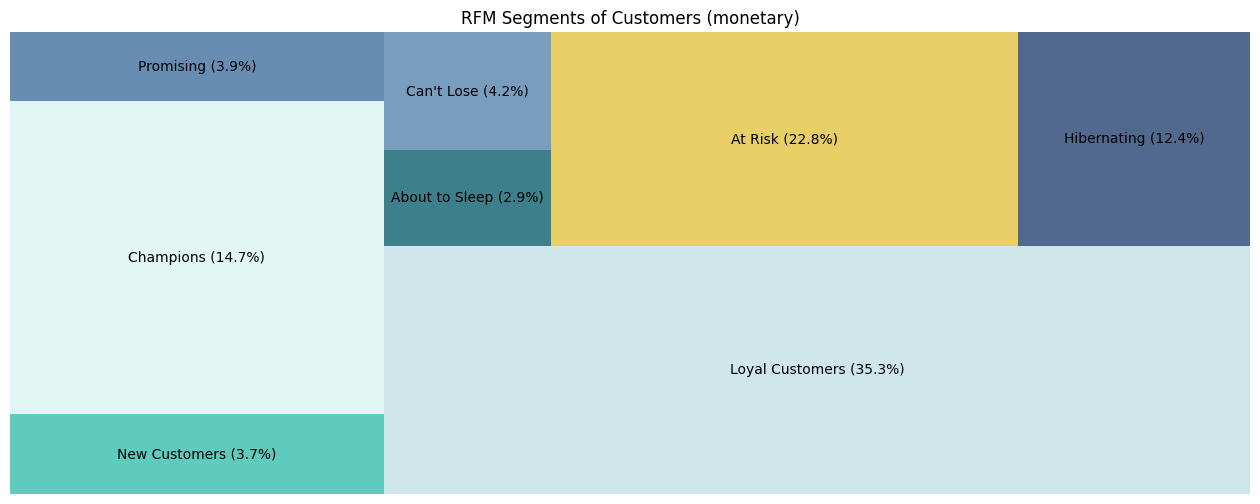

In [ ]:
import squarify
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

# Cluster analysis

In [ ]:
rfm.head(10)

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,segment
CustomerID,,,,,,,,,
11000,522,3,8248.99,2,5,5,255,12,Can't Lose
11001,301,3,6383.88,5,5,5,555,15,Champions
11002,592,3,8114.04,1,5,5,155,11,Can't Lose
11003,515,3,8139.29,2,5,5,255,12,Can't Lose
11004,524,3,8196.01,2,5,5,255,12,Can't Lose
11005,523,3,8121.33,2,5,5,255,12,Can't Lose
11006,511,3,8119.03,2,5,5,255,12,Can't Lose
11007,567,3,8211.00,1,5,5,155,11,Can't Lose
11008,584,3,8106.31,1,5,5,155,11,Can't Lose


In [ ]:
df_cus = rfm.reset_index()[["recency","frequency","monetary", 'Total Score',"segment"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
df_segment = df_cus[['recency', 'frequency', 'monetary', 'Total Score']]
scaler = StandardScaler()
scaler.fit(df_segment)
scaled_df = pd.DataFrame(scaler.transform(df_segment),columns= df_segment.columns)

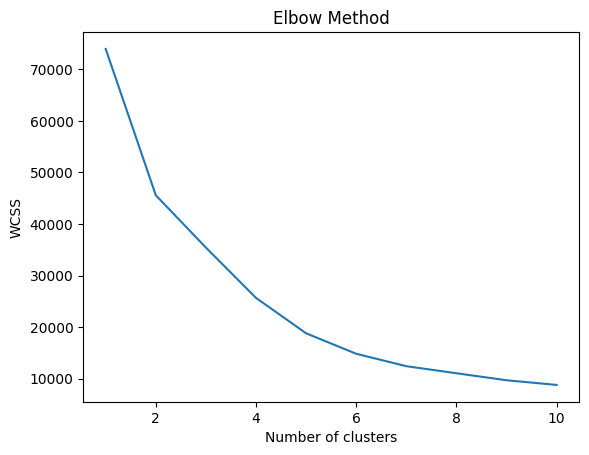

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
#Apply K-Means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_cus['cluster'] = kmeans.fit_predict(scaled_df)

<ipython-input-117-3ccd11f406f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_cus['cluster'], palette=pal)
<ipython-input-117-3ccd11f406f1>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=df_cus['cluster'], palette=pal)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. P

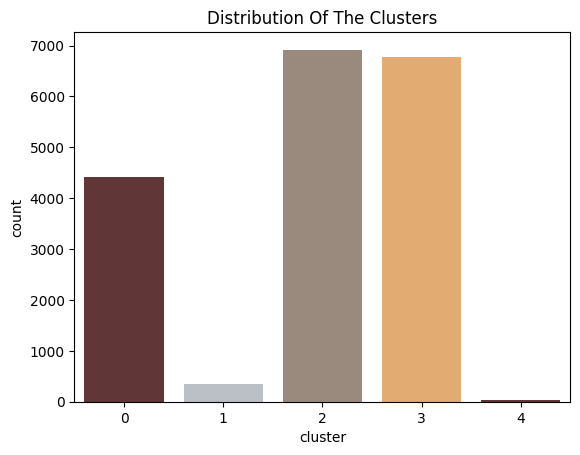

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_cus['cluster'], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
df_cus.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

recency             frequency             monetary            \
                mean  min   max       mean min max         mean       min   
cluster                                                                     
0         423.442177  253   649   2.271429   2   7  4823.892937  127.8000   
1        1153.719547  828  1378   1.000000   1   1  3092.966774  699.0982   
2         344.288234  252   570   1.389274   1   4   588.205744    2.2900   
3         516.158392  379   857   1.027926   1   2   426.977504    2.2900   
4         269.514286  252   309  20.600000  16  28   985.743429  561.5300   

                           
                max count  
cluster                    
0        13295.3800  4410  
1         3578.2700   353  
2         2564.9200  6918  
3         2670.8896  6768  
4         1616.3100    35

In [ ]:
df_cus.groupby(['cluster','segment']).size()

cluster  segment        
0        At Risk            1380
         Can't Lose          171
         Champions           835
         Loyal Customers    2024
1        Hibernating         353
2        About to Sleep      608
         At Risk             337
         Can't Lose           32
         Champions           802
         Loyal Customers    1060
         New Customers      2097
         Promising          1982
3        About to Sleep     1580
         At Risk             189
         Hibernating        4930
         Promising            69
4        Champions            35
dtype: int64

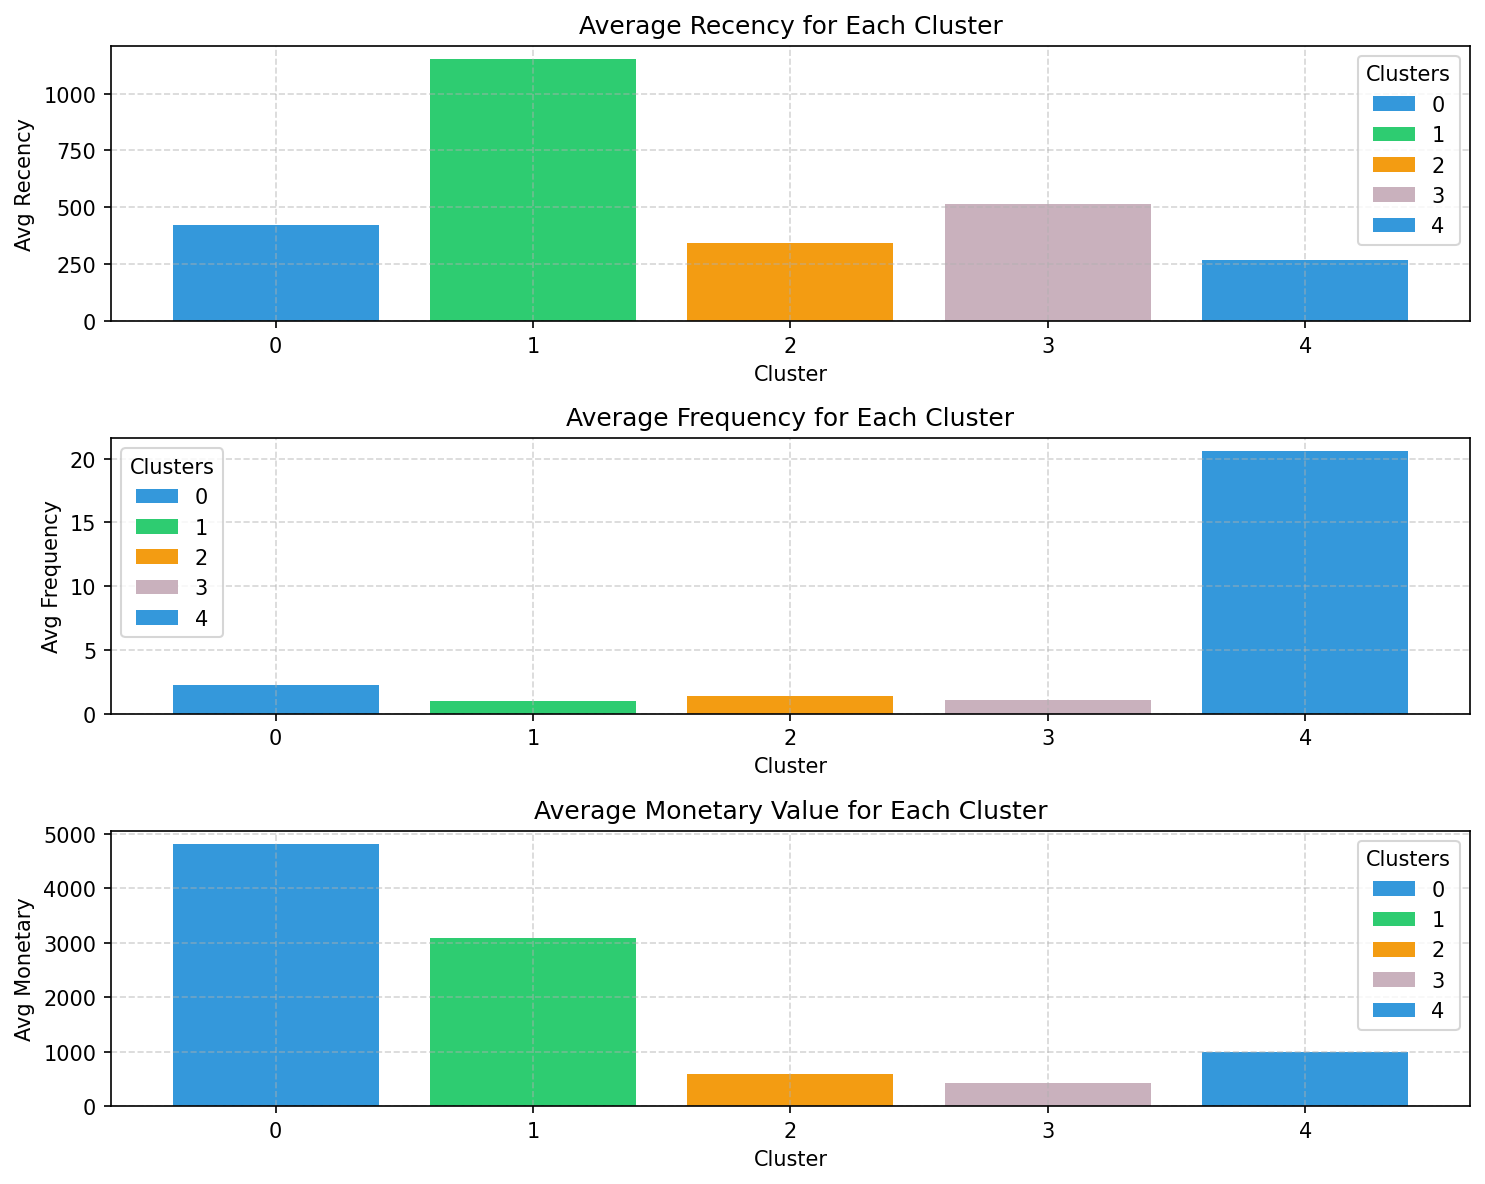

In [ ]:
cluster_summary = df_cus.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()


colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()